In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Insurance_claims.csv')

In [ ]:
df.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,01-02-2019,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,01-02-2019,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,01-02-2019,02-05-2017,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,01-02-2019,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,01-02-2019,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [ ]:
df.isnull().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [ ]:
# Calculating the class counts and percentage
class_counts = df['Fraud'].value_counts()
class_counts_percentage = df['Fraud'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Fraud counts: \n", class_counts)
print("\nFraud counts percentage: \n", class_counts_percentage)

Fraud counts: 
 0    11415
1      115
Name: Fraud, dtype: int64

Fraud counts percentage: 
 0    99.002602
1     0.997398
Name: Fraud, dtype: float64


In [ ]:
dups = df.duplicated() 
print(dups.any()) 
print(df[dups]) 

False
Empty DataFrame
Columns: [ReferenceId, PolicyholderNumber, FirstPartyVehicleNumber, ThirdPartyVehicleNumber, InsurerNotes, PolicyholderOccupation, LossDate, FirstPolicySubscriptionDate, ClaimCause, ClaimInvolvedCovers, DamageImportance, FirstPartyVehicleType, ConnectionBetweenParties, LossPostCode, PolicyHolderPostCode, PolicyWasSubscribedOnInternet, NumberOfPoliciesOfPolicyholder, FpVehicleAgeMonths, EasinessToStage, ClaimWihoutIdentifiedThirdParty, ClaimAmount, LossHour, PolicyHolderAge, NumberOfBodilyInjuries, FirstPartyLiability, Fraud]
Index: []

[0 rows x 26 columns]


In [ ]:
# Mean for nan values in LossHour and PolicyHolderAge columns
df[['LossHour', 'PolicyHolderAge' , 'FpVehicleAgeMonths']] = df[['LossHour', 'PolicyHolderAge' , 'FpVehicleAgeMonths']].fillna(df[['LossHour', 'PolicyHolderAge' , 'FpVehicleAgeMonths']].mean())

In [ ]:
# Dropping columns
df = df.drop(['ThirdPartyVehicleNumber', 'InsurerNotes', 'DamageImportance' , 'ConnectionBetweenParties'], axis=1)

In [ ]:
# Filling low nan values column with mode
df['FirstPartyVehicleType'].fillna(df['FirstPartyVehicleType'].mode()[0], inplace=True)

In [ ]:
# Converting uneven dates to dd-mm-yyyy format
df['LossDate'] = pd.to_datetime(df['LossDate'], infer_datetime_format=True)
df['LossDate'] = df['LossDate'].dt.strftime('%d-%m-%Y')
df['FirstPolicySubscriptionDate'] = pd.to_datetime(df['FirstPolicySubscriptionDate'], infer_datetime_format=True)
df['FirstPolicySubscriptionDate'] = df['FirstPolicySubscriptionDate'].dt.strftime('%d-%m-%Y')


In [ ]:
# Difference between Loss Date and Subscription Date
df['days_diff'] = (pd.to_datetime(df['LossDate'], format='%d-%m-%Y') - pd.to_datetime(df['FirstPolicySubscriptionDate'], format='%d-%m-%Y')).dt.days
df['days_diff']

0         198
1         552
2         696
3         711
4         354
         ... 
11525     705
11526    1326
11527     166
11528     799
11529    1473
Name: days_diff, Length: 11530, dtype: int64

In [ ]:
df.nunique()

ReferenceId                        11530
PolicyholderNumber                  9404
FirstPartyVehicleNumber             9431
PolicyholderOccupation                11
LossDate                             804
FirstPolicySubscriptionDate         1389
ClaimCause                            18
ClaimInvolvedCovers                   68
FirstPartyVehicleType                  4
LossPostCode                        3003
PolicyHolderPostCode                3130
PolicyWasSubscribedOnInternet          2
NumberOfPoliciesOfPolicyholder        17
FpVehicleAgeMonths                   389
EasinessToStage                        4
ClaimWihoutIdentifiedThirdParty        2
ClaimAmount                         8248
LossHour                              25
PolicyHolderAge                       74
NumberOfBodilyInjuries                 6
FirstPartyLiability                    3
Fraud                                  2
days_diff                           1371
dtype: int64

In [ ]:
df.isnull().sum()

ReferenceId                           0
PolicyholderNumber                    0
FirstPartyVehicleNumber             495
PolicyholderOccupation              343
LossDate                              0
FirstPolicySubscriptionDate           0
ClaimCause                          197
ClaimInvolvedCovers                 195
FirstPartyVehicleType                 0
LossPostCode                       1408
PolicyHolderPostCode                  0
PolicyWasSubscribedOnInternet         0
NumberOfPoliciesOfPolicyholder        0
FpVehicleAgeMonths                    0
EasinessToStage                       0
ClaimWihoutIdentifiedThirdParty       0
ClaimAmount                           0
LossHour                              0
PolicyHolderAge                       0
NumberOfBodilyInjuries                0
FirstPartyLiability                   0
Fraud                                 0
days_diff                             0
dtype: int64

In [ ]:
# Converting Claim Amount column to logs 
constant = 1
df['claim_amount_log'] = np.log(df['ClaimAmount'] + constant)

print(df.head())

   ReferenceId  PolicyholderNumber  FirstPartyVehicleNumber  \
0         4842              531112                 715507.0   
1         4844               87170                  71164.0   
2         4848               98706                 442609.0   
3         4849               38240                  24604.0   
4         4850               11339                   2933.0   

  PolicyholderOccupation    LossDate FirstPolicySubscriptionDate  \
0           CivilServant  02-01-2019                  18-06-2018   
1                 Worker  02-01-2019                  29-06-2017   
2                 Worker  02-01-2019                  05-02-2017   
3           CivilServant  02-01-2019                  21-01-2017   
4                 Farmer  02-01-2019                  13-01-2018   

                         ClaimCause  \
0               CollisionWithAnimal   
1                     LossOfControl   
2  AccidentWithIdentifiedThirdParty   
3  AccidentWithIdentifiedThirdParty   
4  AccidentWithId

In [ ]:
df = df.drop(['ClaimAmount'] , axis=1)

In [ ]:
# Changing object type columns into int
cat_df = df.select_dtypes(include = ['object']).copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   PolicyholderOccupation           11187 non-null  object 
 4   LossDate                         11530 non-null  object 
 5   FirstPolicySubscriptionDate      11530 non-null  object 
 6   ClaimCause                       11333 non-null  object 
 7   ClaimInvolvedCovers              11335 non-null  object 
 8   FirstPartyVehicleType            11530 non-null  object 
 9   LossPostCode                     10122 non-null  object 
 10  PolicyHolderPostCode             11530 non-null  object 
 11  PolicyWasSubscribedOnInternet    11530 non-null  int64  
 12  NumberOfPoliciesOf

In [ ]:
cat_df

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,LossPostCode,PolicyHolderPostCode
0,CivilServant,02-01-2019,18-06-2018,CollisionWithAnimal,MaterialDamages ActLiability,Car,31330,31330
1,Worker,02-01-2019,29-06-2017,LossOfControl,MaterialDamages ActLiability,Car,29810,29200
2,Worker,02-01-2019,05-02-2017,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,33500,33500
3,CivilServant,02-01-2019,21-01-2017,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,35310,35310
4,Farmer,02-01-2019,13-01-2018,AccidentWithIdentifiedThirdParty,ActLiability,Car,29600,22000
...,...,...,...,...,...,...,...,...
11525,Employee,17-02-2021,15-03-2019,WindscreenDamage,Windscreen,Car,NaN,84370
11526,Employee,07-03-2021,20-07-2017,WindscreenDamage,Windscreen,Car,NaN,49300
11527,Employee,15-03-2021,30-09-2020,WindscreenDamage,Windscreen,Car,NaN,57200
11528,CivilServant,06-03-2021,28-12-2018,WindscreenDamage,Windscreen,Car,NaN,56880


In [ ]:
df.PolicyholderOccupation = pd.Categorical(df.PolicyholderOccupation).codes
df.ClaimCause = pd.Categorical(df.ClaimCause).codes
df.ClaimInvolvedCovers = pd.Categorical(df.ClaimInvolvedCovers).codes
df.FirstPartyVehicleType = pd.Categorical(df.FirstPartyVehicleType).codes
df.PolicyHolderPostCode = pd.Categorical(df.PolicyHolderPostCode).codes

In [ ]:
df

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,LossPostCode,...,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,days_diff,claim_amount_log
0,4842,531112,715507.0,0,02-01-2019,18-06-2018,3,36,0,31330,...,104.0,0.25,1,8.0,45.0,0,1.0,0,198,8.439389
1,4844,87170,71164.0,10,02-01-2019,29-06-2017,10,36,0,29810,...,230.0,0.50,1,11.0,20.0,0,1.0,0,552,7.382628
2,4848,98706,442609.0,10,02-01-2019,05-02-2017,1,36,0,33500,...,93.0,0.25,0,18.0,32.0,0,0.5,0,696,6.906955
3,4849,38240,24604.0,0,02-01-2019,21-01-2017,1,44,0,35310,...,56.0,0.25,0,11.0,46.0,0,0.5,0,711,7.827209
4,4850,11339,2933.0,3,02-01-2019,13-01-2018,1,12,0,29600,...,110.0,0.25,0,12.0,28.0,0,0.0,0,354,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,1,17-02-2021,15-03-2019,17,57,0,NaN,...,85.0,0.50,1,0.0,56.0,0,0.0,0,705,6.918923
11526,16379,581104,788178.0,1,07-03-2021,20-07-2017,17,57,0,NaN,...,119.0,0.50,1,0.0,54.0,0,0.0,0,1326,5.045681
11527,16380,817231,NaN,1,15-03-2021,30-09-2020,17,57,0,NaN,...,139.0,0.50,1,0.0,34.0,0,0.0,0,166,6.043226
11528,16381,321534,468522.0,0,06-03-2021,28-12-2018,17,57,0,NaN,...,105.0,0.50,1,0.0,58.0,0,0.0,0,799,4.578826


In [ ]:
#There were string values in the code which is changed to nan values
for i in range(len(df)):
    if isinstance(df.loc[i, 'LossPostCode'], str) and not df.loc[i, 'LossPostCode'].isnumeric():
        df.loc[i, 'LossPostCode'] = np.nan
    else:
        df.loc[i, 'LossPostCode'] = float(df.loc[i, 'LossPostCode'])

In [ ]:
#Nan values are changed to 0
df[['LossPostCode']] = df[['LossPostCode']].fillna(0)

In [ ]:
df = df.drop(['LossDate' , 'FirstPolicySubscriptionDate'] , axis=1)

In [ ]:
df

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,LossPostCode,PolicyHolderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,...,EasinessToStage,ClaimWihoutIdentifiedThirdParty,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,days_diff,claim_amount_log,is_suspicious
0,531112,715507.0,0,3,36,0,31330.0,744,1,1,...,0.25,1,8.0,45.0,0,1.0,0,198,8.439389,True
1,87170,71164.0,10,10,36,0,29810.0,606,0,3,...,0.50,1,11.0,20.0,0,1.0,0,552,7.382628,False
2,98706,442609.0,10,1,36,0,33500.0,869,0,9,...,0.25,0,18.0,32.0,0,0.5,0,696,6.906955,False
3,38240,24604.0,0,1,44,0,35310.0,1000,0,2,...,0.25,0,11.0,46.0,0,0.5,0,711,7.827209,False
4,11339,2933.0,3,1,12,0,29600.0,351,0,4,...,0.25,0,12.0,28.0,0,0.0,0,354,2.564949,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,452486,626487.0,1,17,57,0,0.0,2783,0,1,...,0.50,1,0.0,56.0,0,0.0,0,705,6.918923,False
11526,581104,788178.0,1,17,57,0,0.0,1416,0,3,...,0.50,1,0.0,54.0,0,0.0,0,1326,5.045681,False
11527,817231,0.0,1,17,57,0,0.0,1678,0,4,...,0.50,1,0.0,34.0,0,0.0,0,166,6.043226,True
11528,321534,468522.0,0,17,57,0,0.0,1661,0,6,...,0.50,1,0.0,58.0,0,0.0,0,799,4.578826,False


In [ ]:
df.isnull().sum()

ReferenceId                           0
PolicyholderNumber                    0
FirstPartyVehicleNumber             495
PolicyholderOccupation                0
ClaimCause                            0
ClaimInvolvedCovers                   0
FirstPartyVehicleType                 0
LossPostCode                       1408
PolicyHolderPostCode                  0
PolicyWasSubscribedOnInternet         0
NumberOfPoliciesOfPolicyholder        0
FpVehicleAgeMonths                    0
EasinessToStage                       0
ClaimWihoutIdentifiedThirdParty       0
LossHour                              0
PolicyHolderAge                       0
NumberOfBodilyInjuries                0
FirstPartyLiability                   0
Fraud                                 0
days_diff                             0
claim_amount_log                      0
dtype: int64

In [ ]:
df[['FirstPartyVehicleNumber', 'LossPostCode']] = df[['FirstPartyVehicleNumber', 'LossPostCode']].fillna(0)

In [ ]:
df.isnull().sum()

ReferenceId                        0
PolicyholderNumber                 0
FirstPartyVehicleNumber            0
PolicyholderOccupation             0
ClaimCause                         0
ClaimInvolvedCovers                0
FirstPartyVehicleType              0
LossPostCode                       0
PolicyHolderPostCode               0
PolicyWasSubscribedOnInternet      0
NumberOfPoliciesOfPolicyholder     0
FpVehicleAgeMonths                 0
EasinessToStage                    0
ClaimWihoutIdentifiedThirdParty    0
LossHour                           0
PolicyHolderAge                    0
NumberOfBodilyInjuries             0
FirstPartyLiability                0
Fraud                              0
days_diff                          0
claim_amount_log                   0
dtype: int64

In [ ]:
df

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,LossPostCode,PolicyHolderPostCode,PolicyWasSubscribedOnInternet,...,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,days_diff,claim_amount_log
0,4842,531112,715507.0,0,3,36,0,31330,744,1,...,104.0,0.25,1,8.0,45.0,0,1.0,0,198,8.439389
1,4844,87170,71164.0,10,10,36,0,29810,606,0,...,230.0,0.50,1,11.0,20.0,0,1.0,0,552,7.382628
2,4848,98706,442609.0,10,1,36,0,33500,869,0,...,93.0,0.25,0,18.0,32.0,0,0.5,0,696,6.906955
3,4849,38240,24604.0,0,1,44,0,35310,1000,0,...,56.0,0.25,0,11.0,46.0,0,0.5,0,711,7.827209
4,4850,11339,2933.0,3,1,12,0,29600,351,0,...,110.0,0.25,0,12.0,28.0,0,0.0,0,354,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,1,17,57,0,0,2783,0,...,85.0,0.50,1,0.0,56.0,0,0.0,0,705,6.918923
11526,16379,581104,788178.0,1,17,57,0,0,1416,0,...,119.0,0.50,1,0.0,54.0,0,0.0,0,1326,5.045681
11527,16380,817231,0.0,1,17,57,0,0,1678,0,...,139.0,0.50,1,0.0,34.0,0,0.0,0,166,6.043226
11528,16381,321534,468522.0,0,17,57,0,0,1661,0,...,105.0,0.50,1,0.0,58.0,0,0.0,0,799,4.578826


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

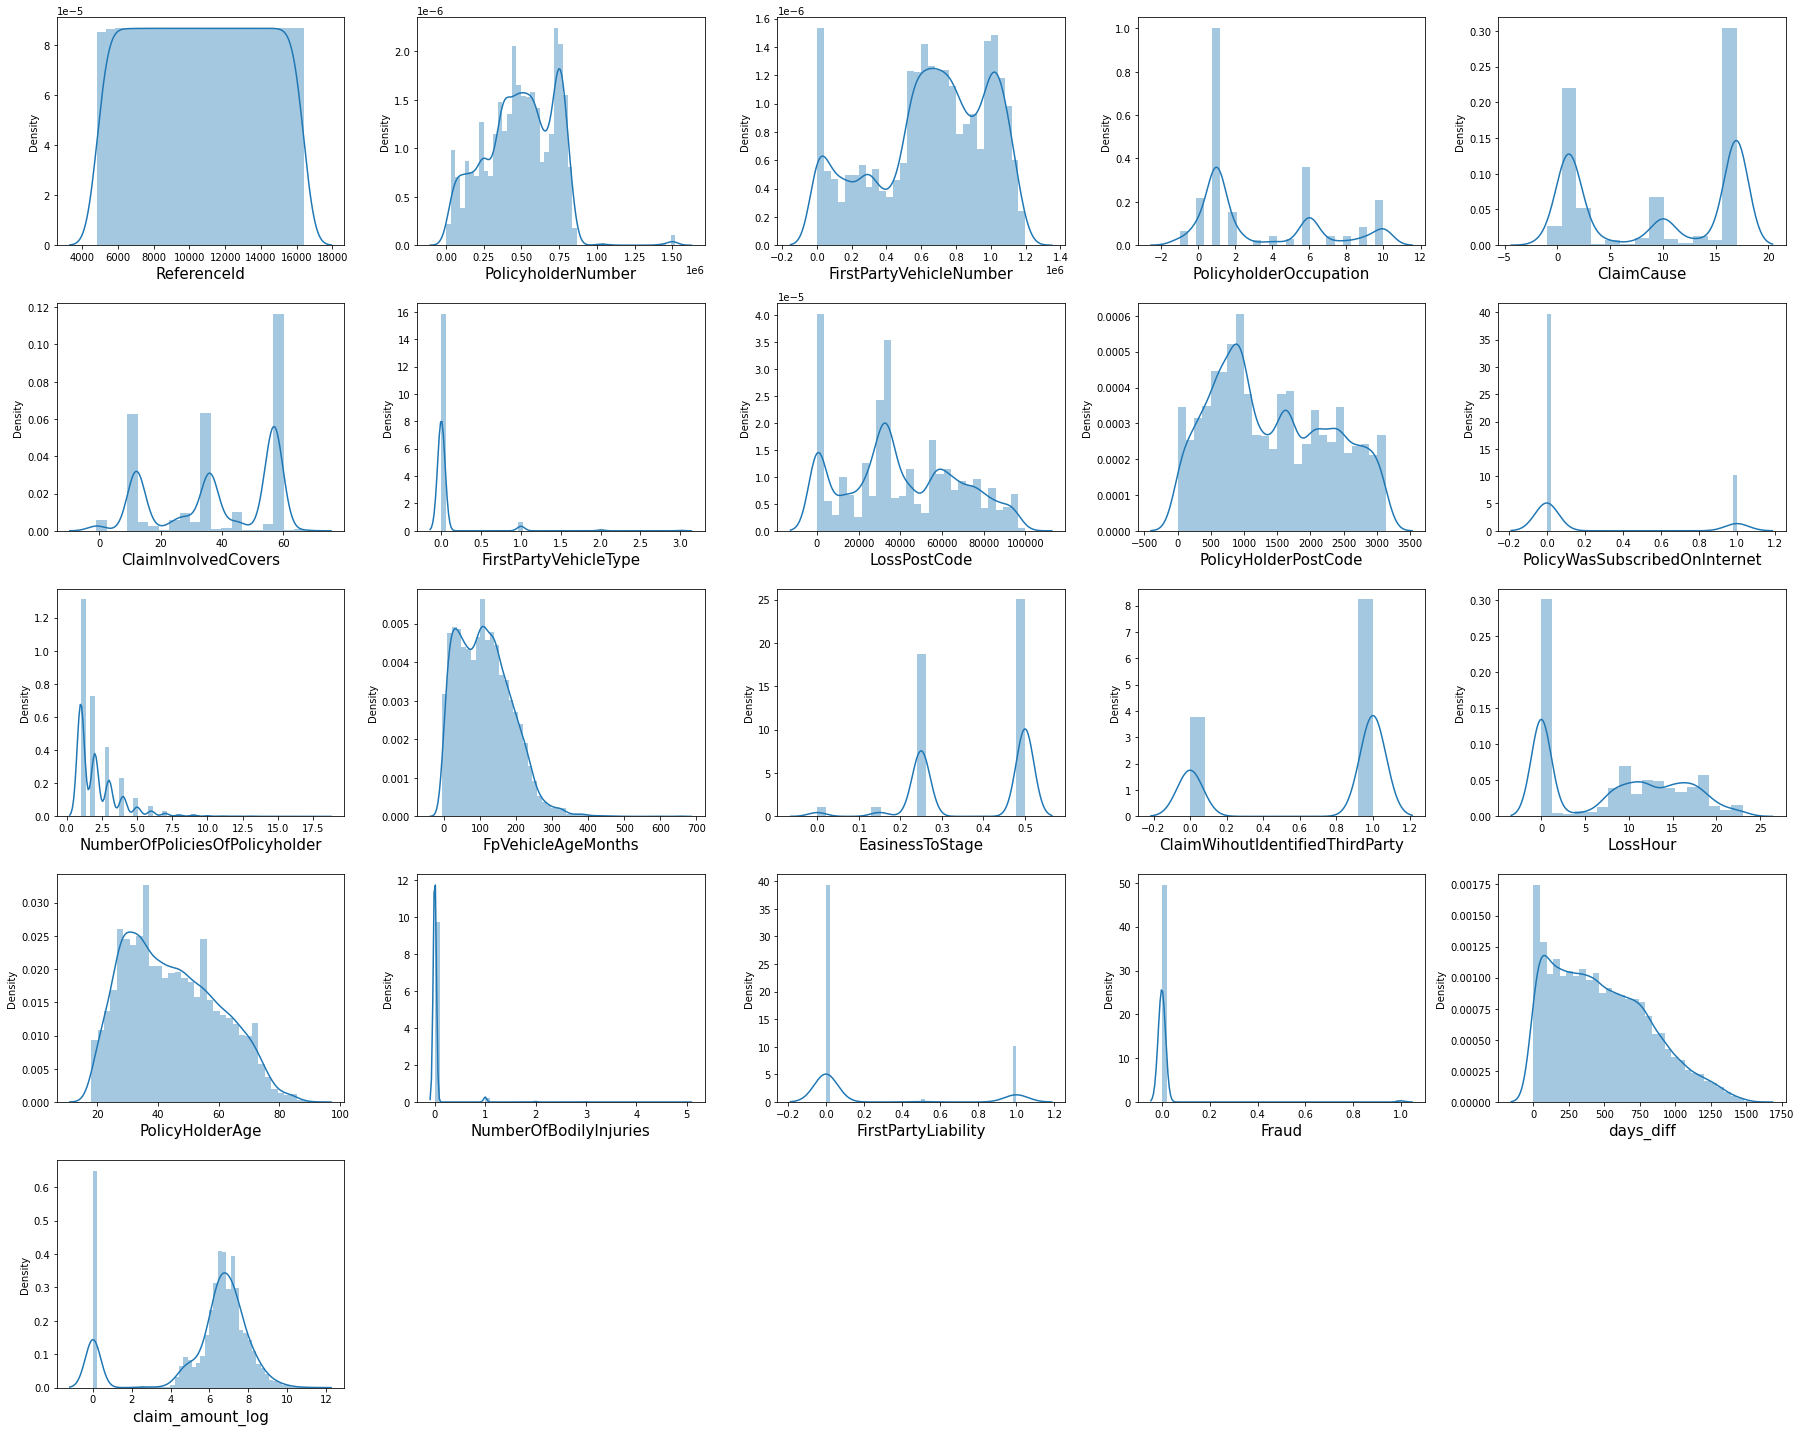

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
# Splitting Data
X1 = df.drop('Fraud', axis = 1)
y1 = df['Fraud']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4)

In [ ]:
X1_train.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,LossPostCode,PolicyHolderPostCode,PolicyWasSubscribedOnInternet,...,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,days_diff,claim_amount_log,is_suspicious
7379,12232,231674,1084882.0,6,0,55,0,29880.0,667,0,...,23.0,0.25,1,15.0,63.0,0,0.0,1046,0.000000,False
4056,8909,564020,754834.0,1,17,57,0,69200.0,2259,1,...,13.0,0.50,1,0.0,37.0,0,0.0,423,3.729061,False
2781,7634,453591,878704.0,1,17,57,0,85570.0,2828,0,...,108.0,0.50,1,15.0,32.0,0,0.0,738,5.778179,False
7031,11884,129653,271587.0,9,17,57,0,56240.0,1619,0,...,143.0,0.50,1,12.0,37.0,0,0.0,980,7.101676,False
9176,14029,593964,791282.0,1,17,57,0,38540.0,1120,1,...,236.0,0.50,1,0.0,23.0,0,0.0,728,6.532305,False


**Question 3 - Simple Model**

t=1, hit rate=0.1565, detection rate=0.2466
t=2, hit rate=0.2609, detection rate=0.2885
t=3, hit rate=0.2783, detection rate=0.2645
t=4, hit rate=0.3304, detection rate=0.2346
t=5, hit rate=0.3826, detection rate=0.2234
t=6, hit rate=0.4435, detection rate=0.2170
t=7, hit rate=0.4609, detection rate=0.2038
t=8, hit rate=0.4783, detection rate=0.1923
t=9, hit rate=0.4957, detection rate=0.1881
t=10, hit rate=0.5130, detection rate=0.1873
t=11, hit rate=0.5391, detection rate=0.1845
t=12, hit rate=0.5391, detection rate=0.1708
t=13, hit rate=0.5391, detection rate=0.1627
t=14, hit rate=0.5826, detection rate=0.1650
t=15, hit rate=0.5913, detection rate=0.1604
t=16, hit rate=0.6087, detection rate=0.1587
t=17, hit rate=0.6348, detection rate=0.1563
t=18, hit rate=0.6609, detection rate=0.1554
t=19, hit rate=0.6696, detection rate=0.1531
t=20, hit rate=0.6783, detection rate=0.1486
t=21, hit rate=0.6783, detection rate=0.1431
t=22, hit rate=0.6957, detection rate=0.1421
t=23, hit rate=0.71

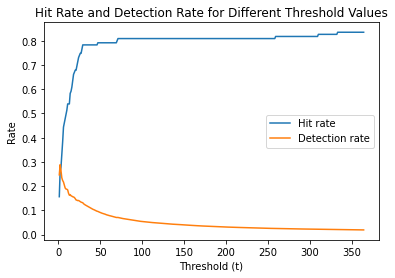

In [ ]:
# Define features and target variable
X = df[['days_diff']] 
y = df['Fraud']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Define threshold value t
t_values = range(1, 365)

# Create lists to store hit rate and detection rate for different t values
hit_rates = []
detection_rates = []

# Compute hit rate and detection rate for different values of t
for t in t_values:
    df['is_suspicious'] = (df['days_diff']) <= t
    true_positives = ((df['is_suspicious'] == True) & (df['Fraud'] == True)).sum()
    false_positives = ((df['is_suspicious'] == True) & (df['Fraud'] == False)).sum()
    true_negatives = ((df['is_suspicious'] == False) & (df['Fraud'] == False)).sum()
    false_negatives = ((df['is_suspicious'] == False) & (df['Fraud'] == True)).sum()
    hit_rate = true_positives / (true_positives + false_negatives)
    detection_rate = true_positives / (true_positives + false_positives)
    hit_rates.append(hit_rate)
    detection_rates.append(detection_rate)
    print(f"t={t}, hit rate={hit_rate:.4f}, detection rate={detection_rate:.4f}")

# Create a line plot of hit rate and detection rate against t values
fig, ax = plt.subplots()
ax.plot(t_values, hit_rates, label='Hit rate')
ax.plot(t_values, detection_rates, label='Detection rate')
ax.set_xlabel('Threshold (t)')
ax.set_ylabel('Rate')
ax.set_title('Hit Rate and Detection Rate for Different Threshold Values')
ax.legend()
plt.show()


**Question 4 - Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X1_train, y1_train)

y_pred = dtc.predict(X1_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y1_train, dtc.predict(X1_train))
dtc_test_acc = accuracy_score(y1_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y1_test, y_pred))
print(classification_report(y1_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9796183868169991
[[4512   61]
 [  33    6]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4573
           1       0.09      0.15      0.11        39

    accuracy                           0.98      4612
   macro avg       0.54      0.57      0.55      4612
weighted avg       0.99      0.98      0.98      4612



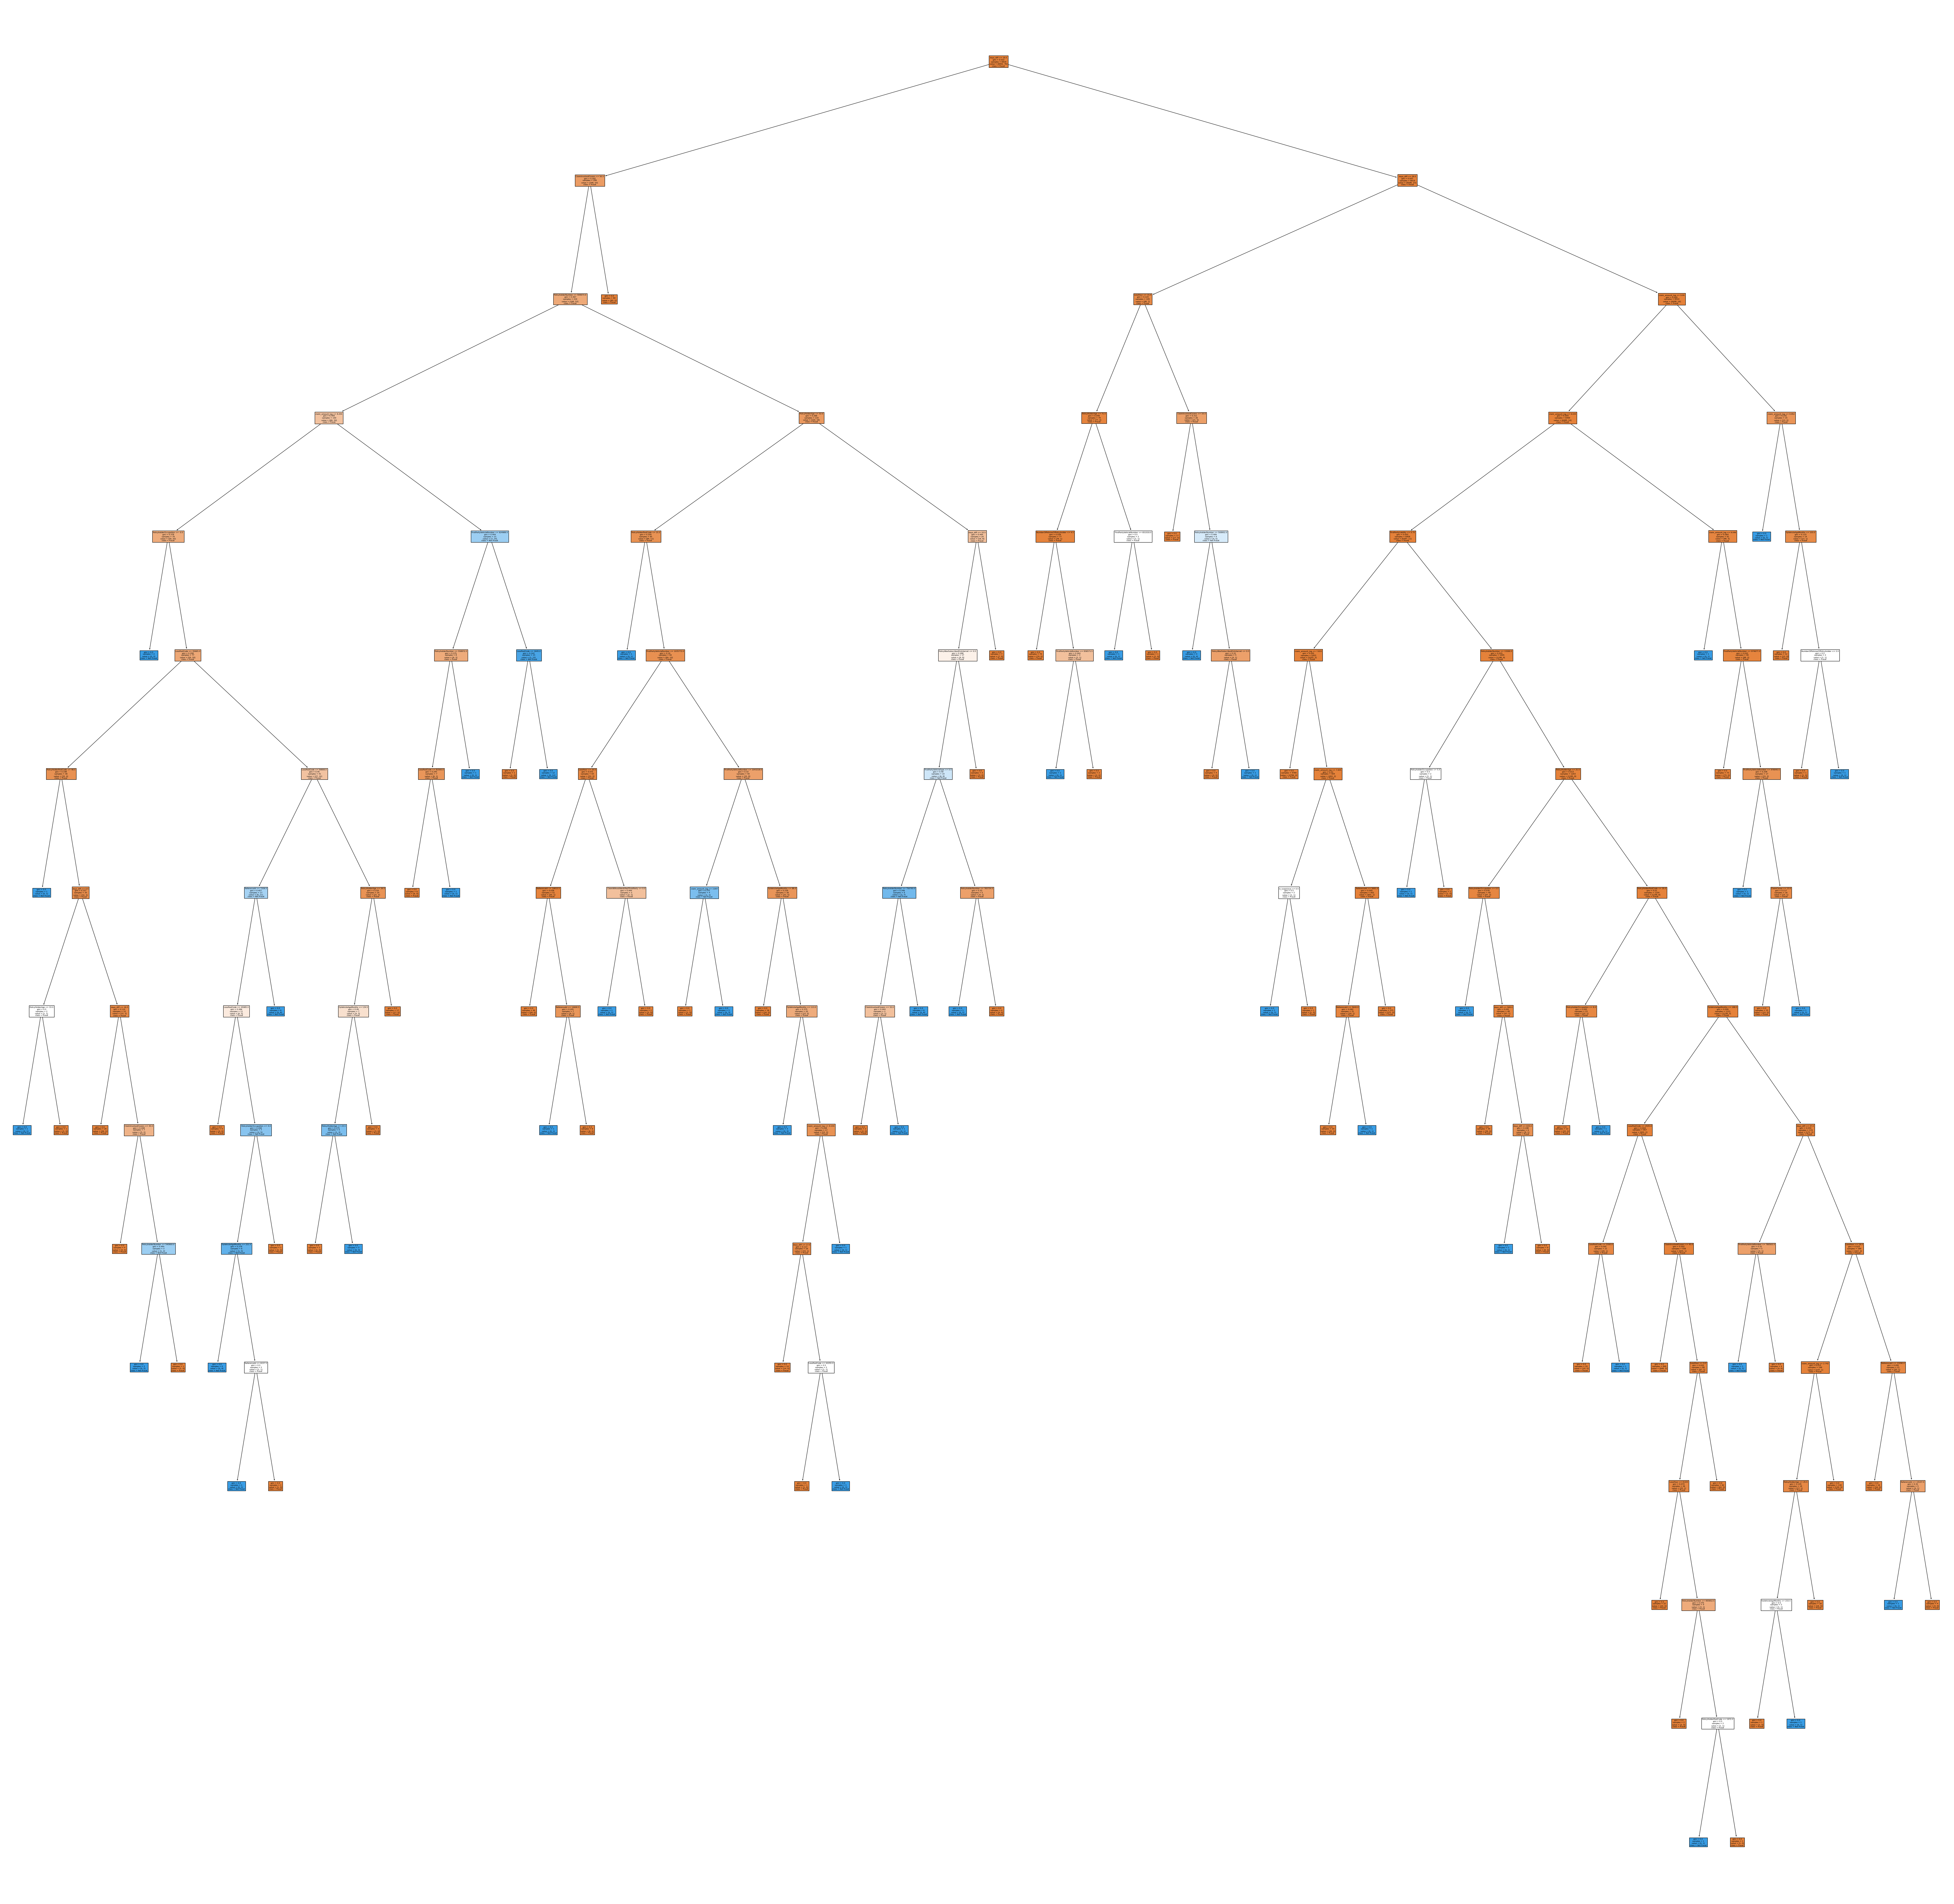

Hit Rate: 10.26%
Detection Rate: 7.14%


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Build a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X1_train, y1_train)

# Visualize the decision tree
plt.figure(figsize=(100,100))
plot_tree(clf, filled=True, feature_names=X1_train.columns, class_names=['Not Fraud', 'Fraud'])
plt.show()

# Evaluate the model on the testing set
y_pred = clf.predict(X1_test)

# Calculate the hit rate and detection rate
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred).ravel()
hit_rate = tp / (tp + fn)
detection_rate = tp / (tp + fp)

# Print the hit rate and detection rate
print("Hit Rate: {:.2f}%".format(hit_rate * 100))
print("Detection Rate: {:.2f}%".format(detection_rate * 100))